### 001 데이터를 읽어 들이자

In [1]:
import pandas as pd
customer_master = pd.read_csv('./data/customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [2]:
item_master = pd.read_csv('./data/item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [3]:
transaction_1 = pd.read_csv('./data/transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [4]:
transaction_detail_1 = pd.read_csv('./data/transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


### 002 데이터를 결합 (유니언)해 보자

In [5]:
transaction_2 = pd.read_csv('./data/transaction_2.csv')
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [6]:
transaction_detail_2 = pd.read_csv('./data/transaction_detail_2.csv')
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


### 003 매출 데이터끼리 결합(조안)해 보자head

In [7]:
join_data = pd.merge(transaction_detail, transaction[['transaction_id', 'payment_date', 'customer_id']], on='transaction_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


### 004 마스터데이터를 결합(조인)해 보자

In [8]:
join_data = pd.merge(join_data, customer_master, on='customer_id', how='left')
join_data = pd.merge(join_data, item_master, on='item_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


### 005 필요한 데이터 칼럼을 만들자

In [9]:
join_data['price'] = join_data['quantity'] * join_data['item_price']
join_data[['quantity', 'item_price', 'price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


### 006 데이터를 검산하자

In [10]:
print(join_data['price'].sum())
print(transaction['price'].sum())

675765000
971135000


In [11]:
join_data['price'].sum() == transaction['price'].sum()

False

### 007 각종 통계량을 파악하자

In [12]:
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [13]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2499.500000,1.199200,50.197000,120990.000000,135153.00000
std,1443.520003,0.513393,17.199912,64467.674971,68584.12606
min,0.000000,1.000000,20.000000,50000.000000,50000.00000
25%,1249.750000,1.000000,36.000000,50000.000000,85000.00000
50%,2499.500000,1.000000,50.000000,85000.000000,120000.00000
75%,3749.250000,1.000000,65.000000,180000.000000,210000.00000
max,4999.000000,4.000000,80.000000,210000.000000,420000.00000


In [14]:
print(join_data['payment_date'].min())
print(join_data['payment_date'].max())

2019-02-01 01:36:57
2019-06-08 17:18:18


### 008 월별로 데이터를 집계해 보자

In [15]:
join_data.dtypes

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

In [16]:
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])
join_data['payment_month'] = join_data['payment_date'].dt.strftime("%Y%m")
join_data[['payment_date', 'payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [17]:
join_data.groupby('payment_month').sum()['price']

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906     39280000
Name: price, dtype: int64

### 009 월별, 상품별로 데이터를 집계해보자

In [18]:
join_data.groupby(['payment_month', 'item_name']).sum()[['price', 'quantity']]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A        7000000       140
              PC-B        5610000        66
              PC-C        4320000        36
              PC-D        8280000        46
              PC-E       14070000        67

In [19]:
pd.pivot_table(join_data, index='item_name', columns='payment_month', values=['price', 'quantity'], aggfunc='sum')

price                                         quantity  \
payment_month    201902    201903    201904    201905    201906   201902   
item_name                                                                  
PC-A           24150000  26000000  25900000  24850000   7000000      483   
PC-B           25245000  25500000  23460000  25330000   5610000      297   
PC-C           19800000  19080000  21960000  20520000   4320000      165   
PC-D           31140000  25740000  24300000  25920000   8280000      173   
PC-E           59850000  64050000  64890000  58800000  14070000      285   

                                           
payment_month 201903 201904 201905 201906  
item_name                                  
PC-A             520    518    497    140  
PC-B             300    276    298     66  
PC-C             159    183    171     36  
PC-D             143    135    144     46  
PC-E             305    309    280     67

### 010 상품별 매풀 추이를 가시화해 보자

In [20]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')

In [21]:
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,7000000,5610000,4320000,8280000,14070000


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

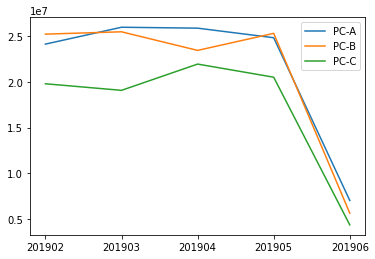

In [23]:
plt.plot(list(graph_data.index), graph_data['PC-A'], label='PC-A')
plt.plot(list(graph_data.index), graph_data['PC-B'], label='PC-B')
plt.plot(list(graph_data.index), graph_data['PC-C'], label='PC-C')
plt.legend()